In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 基础操作

### 读取/显示/保存 图片

In [2]:
# opencv中是以BGR的顺序存储的（调换了1和3通道）
img = cv2.imread('../resources/lena.jpg')
    # 省略了第二个参数图片类型：彩色图、灰度图、带透明通道图

cv2.imshow('lena', img)     # 不同窗口以窗口名区分
cv2.waitKey(0)      # 让窗口一直等待，不继续执行

cv2.imwrite('lena.bmp', img)    # 画质最高
cv2.imwrite('lena.jpg', img)    # 体积很小
cv2.imwrite('lena.png', img)

True

### 摄像头

In [ ]:
capture = cv2.VideoCapture(0)

# capture.get(id)       # 不同的id获取摄像头属性
# capture.set(xxx)      # 修改摄像头的一些属性

while True:
    ret, frame = capture.read()
    cv2.imshow('frame', frame)

### 视频

省略[录制保存视频](http://codec.wang/#/opencv/start/03-open-camera)等操作

In [ ]:
capture = cv2.VideoCapture('demo.mp4')

width, height = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*'mp4v', 25, (width, height)))

if capture.isOpened():
    ret, frame = capture.read()
else:
    ret = False

while ret:
    # todo with frame
    writer.write(frame)
    ret, frame = capture.read()

writer.release()

### 统计时间

In [6]:
# 1
start = cv2.getTickCount()

end = cv2.getTickCount()

t = (end - start) / cv2.getTickFrequency()
print(t)

# 2
import time
start = time.clock()

end = time.clock()
t = end - start
print(t)

3.9695e-05
7.200000000029405e-05


/Users/doublez/opt/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/Users/doublez/opt/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [13]:
%%time
# 3 要写在第一行
img = cv2.imread('../resources/lena.jpg')

CPU times: user 2.25 ms, sys: 1.46 ms, total: 3.71 ms
Wall time: 1.91 ms


## 图像属性与基本操作

In [6]:
img = cv2.imread('../resources/lena.jpg')
# 像素操作
print(img[100, 50])     # 获取像素值
print(img[100, 50, 0])  # 获取B通道的值
print(img.item(100, 50, 0))     # 性能更好，不过只能逐通道获取

img[100, 50] = [255, 255, 255]      # 修改像素值，⚠️只是内存中的变量改变了，没有保存所以原图没有修改

[ 76  66 173]
76
76


In [7]:
height, width, channels = img.shape
print(img.shape)    # 尺寸
height, width = img.shape[:2]  # 宽和高
print(img.dtype)    # 数据类型
print(img.size)     # 总像素数

(263, 263, 3)
uint8
207507


In [10]:
# 通道分割与合并
b, g, r = cv2.split(img)        # 比较耗时
img = cv2.merge((b, g, r))

b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]
print(b)

[[126 125 124 ... 126 117  85]
 [127 126 122 ... 131 128  93]
 [124 125 121 ... 140 134  93]
 ...
 [ 59  59  59 ...  80  79  80]
 [ 56  58  55 ...  84  85  80]
 [ 51  63  58 ...  85  88  88]]


## 颜色空间

HSV比RGB更容易区分颜色，可以用来提取某个颜色的部分

由于某些原因 H的范围是[0, 179] S V的范围是[0, 255]

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 常见的灰度化: gray = 0.299 * R + 0.587 * G + 0.114 * B

# 显示所有转换模式
# print([_ for _ in dir(cv2) if _.startswith('COLOR_')])

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

### 颜色滤除 / 掩膜

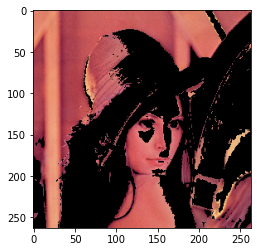

In [21]:
# 只保留某个颜色的部分
lower = np.array([100, 110, 110])   # ⚠️这个颜色也要提前转换为hsv格式
upper = np.array([130, 255, 255])

img = cv2.imread('../resources/lena.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(res[:,:,::-1])

## 阈值分割

In [2]:
img = cv2.imread('../resources/lena.jpg', )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### 简单阈值分割

【参数】
- 第二个：阈值
- 第三个：最大阈值

【方法】
- THRESH_BINARY：大于阈值为max，小于阈值的归零
- THRESH_BINARY_INV
- THRESH_TRUNC：将过大的斩断为阈值
- THRESH_TOZERO：超过阈值的不便，小的归零
- THRESH_TOZERO_INV

[[225 225 225 ... 225 225   0]
 [225 225 225 ... 225 225   0]
 [225 225 225 ... 225 225   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


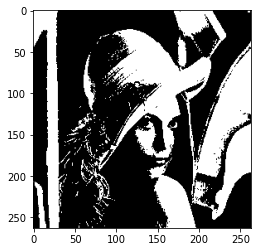

In [11]:
ret, th = cv2.threshold(gray, 127, 225, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')
print(np.array(th))

### 自适应阈值

对每个小区域独立阈值

【参数】
- 第二个：最大阈值
- 第三个：小区域阈值计算方法
    - MEAN
    - GAUSSIAN：小区域里加权求和
- 第四个：只能选择BINARY的两个
- 第五个：小区域的面积
- 第六个：小区域算完的阈值再减去这个值

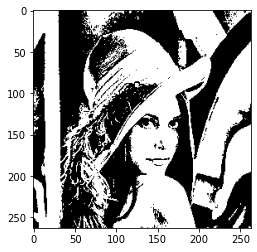

In [17]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 4)
plt.imshow(th, cmap='gray')

### Otsu阈值法

自动计算阈值，主要针对双峰图片（前景色、背景色）

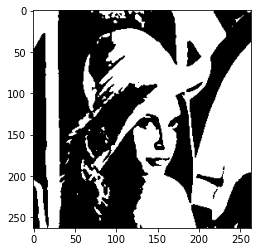

In [21]:
# 一般先进行高斯滤波
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th, cmap='gray')

## 几何变换

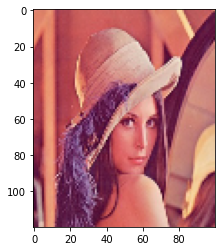

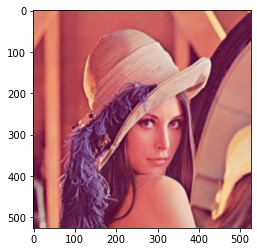

In [47]:
img = cv2.imread('../resources/lena.jpg')

# 缩放/插值
resize_s = cv2.resize(img, (100, 120))
resize_l = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

plt.figure(); plt.imshow(resize_s[:,:,::-1])
plt.figure(); plt.imshow(resize_l[:,:,::-1])

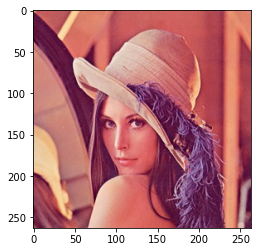

In [51]:
# 翻转
flip = cv2.flip(img, 1)     # 1左右翻转 0上下翻转
plt.imshow(flip[:,:,::-1])

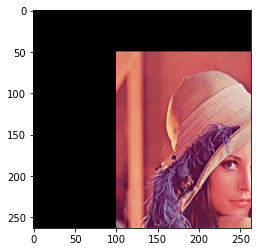

In [53]:
# 平移
rows, cols = img.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 50]])       # 平移矩阵（向右100 向下50）
shift = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(shift[:,:,::-1])

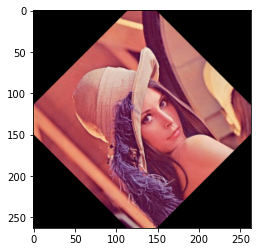

In [57]:
# 旋转
# 旋转中心｜旋转角度｜缩放比例
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.8)
rotate = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(rotate[:,:,::-1])

### 仿射变换

2*3变换矩阵：线性变换4维度 + 平移两维度

平移、缩放、旋转、翻转

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f84b55a0f10>)

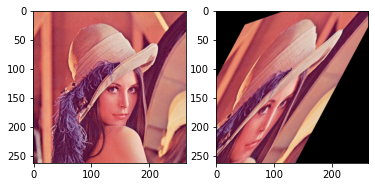

In [6]:
img = cv2.imread('../resources/lena.jpg')
rows, cols = img.shape[:2]

# 两个点就有六个参数，刚好解方程组构建仿射变换
pts1 = np.float32([[50, 65], [150, 65], [210, 210]])
pts2 = np.float32([[50, 100], [150, 65], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.subplot(122), plt.imshow(dst[:,:,::-1])

### 透视变换

3*3矩阵 8dof

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f84b96a1490>)

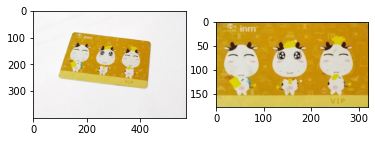

In [8]:
img = cv2.imread('../resources/card.jpg')

# 可以通过特征提取等方式获得
pts1 = np.float32([[148, 80], [437, 114], [94, 247], [423, 288]])
pts2 = np.float32([[0, 0], [320, 0], [0, 178], [320, 178]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (320, 178))

plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.subplot(122), plt.imshow(dst[:,:,::-1])

## 绘图

绘制特殊形状这里省略（圆、椭圆、多边形等），这里只记录直线、矩形、文字

！所有绘图函数都会直接影响原图

【参数】
- 图片
- 起点
- 终点
- 颜色：BGR格式
- 线宽

(300, 500, 3)


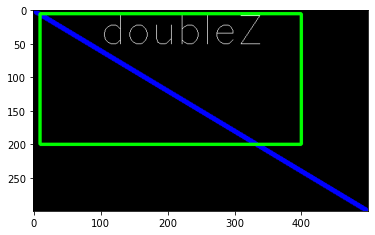

In [6]:
img = np.zeros((300, 500, 3), np.uint8)

cv2.line(img, (0,0), (500, 300), (255, 0, 0), 5)
cv2.rectangle(img, (10, 5), (400, 200), (0, 255, 0), 3)
cv2.putText(img, 'doubleZ', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255))

plt.imshow(img[:,:,::-1])
print(img.shape)

### 滑动条

In [ ]:
def call_back_func(x):
    print(x)

img = np.zeros((0,0,1), np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('attr', 'image', 0, 255, call_back_func)
while True:
    cv2.imshow('image', img)

    if cv2.waitKey(1) == 27:    # Esc
        break

    attr = cv2.getTrackbarPos('attr', 'image')
    img[:] = [attr, attr, attr]

### 鼠标绘图

In [ ]:
def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)

cv2.setMouseCallback('image', mouse_event)

## 高级图像操作

In [ ]:
# 图像按位取反
img_inv = cv2.bitwise_not(img)

### 图像融合

$dst = \alpha * img1 + \beta * img2 + \gamma$

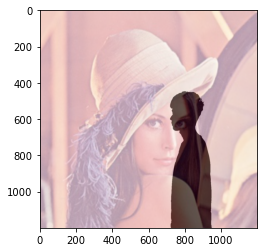

In [12]:
img1 = cv2.imread('../resources/doubleZ.jpg')
img2 = cv2.imread('../resources/lena.jpg')

img2 = cv2.resize(img2, img1.shape[:2])

res = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
plt.imshow(res[:,:,::-1])

### 图像掩膜

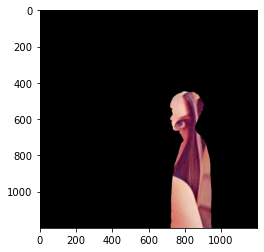

In [28]:
img = cv2.imread('../resources/doubleZ.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

img = cv2.imread('../resources/lena.jpg')
img = cv2.resize(img, (1200, 1200))

cover = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cover[:,:,::-1])


## CV算法

### 图像平滑

低通滤波器，把高频噪声部分滤出掉，平滑图像

- 均值滤波：区域求平均
- 方框滤波：跟均值滤波很像
    - normalize为False：跟均值一样
    - normalize为True，a=1，相当于求区域的像素和
- 高斯滤波：中间像素权重高，第三个参数越大模糊效果越大
- 中值滤波：适合椒盐噪声（非线性操作效率低）
- 双边滤波：保持更多边缘信息（非线性操作效率低）
    - 第二参数：过滤时周围每个像素临域的直径
    - 第三个参数：color space中过滤sigma，参数越大临近像素将会在越远的地方mix
    - 第四参数：coordinate space做这件事情

In [ ]:
# 均值滤波
blur = cv2.blur(img, (3, 3))

# 方框滤波：
box = cv2.boxFilter(img, -1, (3, 3), normalize=True)

# 高斯滤波
gaussian = cv2.GaussianBlur(img, (5, 5), 1)

# 中值滤波
median = cv2.medianBlur(img, 5)

# 双边滤波
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

【关于高斯的扩展】
- 高维高斯函数具有可分离型，OpenCV首先计算水平方向再计算垂直方向，都是一维卷积
- 小于7*7的高斯核都是直接计算好放在数组里的

### 边缘检测

Canny边缘检测法：高低比推荐在2:1～3:1之间
- 参数2:最低阈值
- 参数3:最高阈值

内部算法具体步骤：
1. 5*5高斯滤波消除噪声
2. 计算图像梯度方向
3. 取局部极大值
4. 通过阈值进行滤除

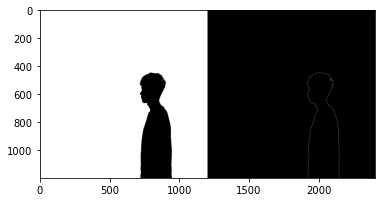

In [10]:
img = cv2.imread('../../resources/doubleZ.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
edge = cv2.Canny(th, 30, 70)

plt.imshow(np.hstack((th, edge)), cmap="gray")

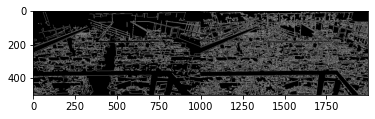

In [11]:
img = cv2.imread('../../resources/opencv/canny.jpg')
img = cv2.resize(img, (1000, 500))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

canny = cv2.Canny(gray, 200, 300)
canny2 = cv2.Canny(gray, 0, 100)

plt.imshow(np.hstack((canny, canny2)), cmap="gray")

### 形态学操作

形态学操作，改变物体形状

一般作用于二值图像，针对白色部分，链接相邻元素或分离成独立元素 -> 变胖变瘦

![](http://cos.codec.wang/cv2_morphological_struct_element.jpg)


#### 腐蚀

小区域内取最小值，如果周围有一个0，则该点就是0，达到瘦身的目的

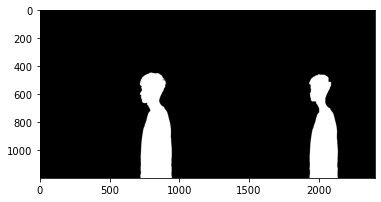

In [31]:
# 腐蚀
img = cv2.imread('../../resources/doubleZ.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((21, 21), np.uint8)
erosion = cv2.erode(th, kernel)

plt.imshow(np.hstack((th, erosion)), cmap='gray')

## kernel类型
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))      # 矩形结构
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))   # 椭圆结构
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))     # 十字形结构

#### 膨胀

取局部最大值，让图片变胖

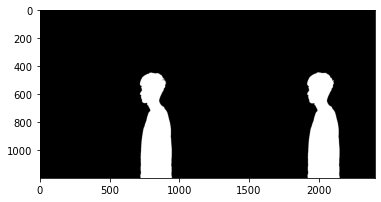

In [32]:
# 膨胀
dilation = cv2.dilate(th, kernel)
plt.imshow(np.hstack((th, dilation)), cmap='gray')

#### 开/闭运算

- 开运算：先腐蚀后膨胀（先腐蚀会让物体分开），分离物体，消除小区域
- 闭运算：先膨胀后腐蚀（先膨胀让白色部分扩张，消除物体里面的小黑洞）

![](http://cos.codec.wang/cv2_morphological_opening_closing.jpg)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# 开运算
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 闭运算
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

#### 其他形态学操作

- 形态学梯度：膨胀 - 腐蚀，得到物体轮廓
- 顶帽：原图 - 开运算
- 黑帽：闭运算 - 原图

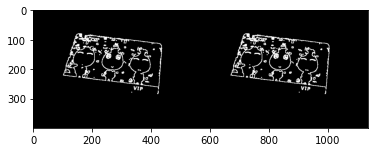

In [37]:
_, th = cv2.threshold(cv2.cvtColor(cv2.imread('../../resources/opencv/card.jpg'), cv2.COLOR_RGB2GRAY), 127, 256, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

erosion = cv2.erode(th, kernel)
dilation = cv2.dilate(th, kernel)

gradient = cv2.morphologyEx(th, cv2.MORPH_GRADIENT, kernel)
gradient_ = dilation - erosion
plt.imshow(np.hstack((gradient, gradient_)), cmap='gray')

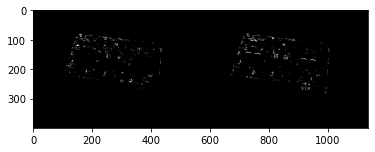

In [38]:
tophat = cv2.morphologyEx(th, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(th, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(np.hstack((tophat, blackhat)), cmap='gray')